In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

NUM_POINTS = 2048

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=1.0, s=1)
    ax.set_aspect('equal')
    # ax.set_axis_off()
    plt.show()

In [34]:
# stl読み込み
mesh_full = o3d.io.read_triangle_mesh('./stl/scan_1_edit.stl')
mesh_inside = o3d.io.read_triangle_mesh('./stl/scan_1_trim.stl')

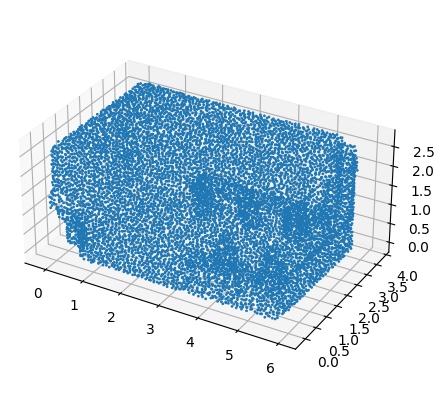

In [17]:
point_cloud = mesh_full.sample_points_poisson_disk(number_of_points=10000)
points_for_corners = np.array(point_cloud.points)
plot3d_points(points_for_corners)

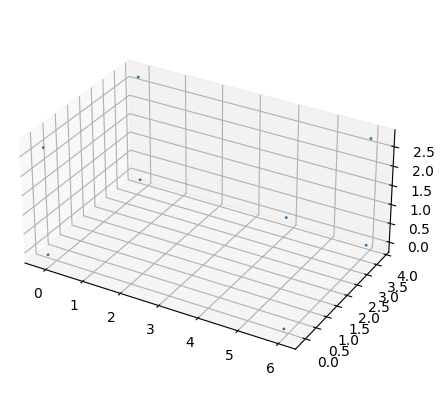

In [32]:
# 部屋の隅の点

x_min = min(points_for_corners[:,0])
x_max = max(points_for_corners[:,0])
y_min = min(points_for_corners[:,1])
y_max = max(points_for_corners[:,1])
z_min = min(points_for_corners[:,2])
z_max = max(points_for_corners[:,2])

corner_1 = np.array([[x_min, y_min, z_min]])
corner_2 = np.array([[x_max, y_min, z_min]])
corner_3 = np.array([[x_min, y_max, z_min]])
corner_4 = np.array([[x_max, y_max, z_min]])
corner_5 = np.array([[x_min, y_min, z_max]])
corner_6 = np.array([[x_max, y_min, z_max]])
corner_7 = np.array([[x_min, y_max, z_max]])
corner_8 = np.array([[x_max, y_max, z_max]])

corner_points = np.concatenate([corner_1, corner_2, corner_3, corner_4, corner_5, corner_6, corner_7, corner_8], axis=0)

plot3d_points(corner_points)

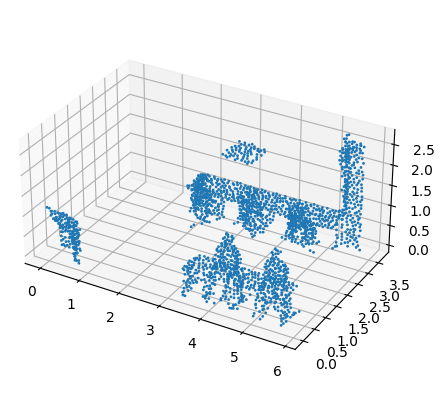

In [35]:
# 壁，床，天井以外の点

point_cloud = mesh_inside.sample_points_poisson_disk(number_of_points=NUM_POINTS-8)
inside_points = np.array(point_cloud.points)

plot3d_points(inside_points)

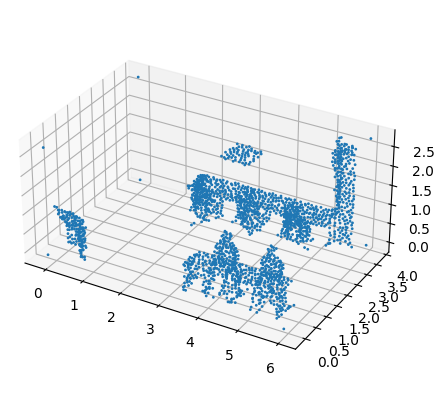

In [36]:
points = np.concatenate([corner_points, inside_points], axis=0)

plot3d_points(points)

In [56]:
scan_points = []

for i in range(6):
    mesh_full = o3d.io.read_triangle_mesh(f'./stl/scan_{i+1}_edit.stl')
    mesh_inside = o3d.io.read_triangle_mesh(f'./stl/scan_{i+1}_trim.stl')

    point_cloud = mesh_full.sample_points_poisson_disk(number_of_points=10000)
    points_for_corners = np.array(point_cloud.points)

    x_min = min(points_for_corners[:,0])
    x_max = max(points_for_corners[:,0])
    y_min = min(points_for_corners[:,1])
    y_max = max(points_for_corners[:,1])
    z_min = min(points_for_corners[:,2])
    z_max = max(points_for_corners[:,2])

    # print(x_min, x_max, y_min, y_max, z_min, z_max)

    corner_1 = np.array([[x_min, y_min, z_min]])
    corner_2 = np.array([[x_max, y_min, z_min]])
    corner_3 = np.array([[x_min, y_max, z_min]])
    corner_4 = np.array([[x_max, y_max, z_min]])
    corner_5 = np.array([[x_min, y_min, z_max]])
    corner_6 = np.array([[x_max, y_min, z_max]])
    corner_7 = np.array([[x_min, y_max, z_max]])
    corner_8 = np.array([[x_max, y_max, z_max]])

    corner_points = np.concatenate([corner_1, corner_2, corner_3, corner_4, corner_5, corner_6, corner_7, corner_8], axis=0)

    point_cloud = mesh_inside.sample_points_poisson_disk(number_of_points=NUM_POINTS-8)
    inside_points = np.array(point_cloud.points)

    points = np.concatenate([corner_points, inside_points], axis=0)

    scan_points.append(points)

scan_points = np.array(scan_points)

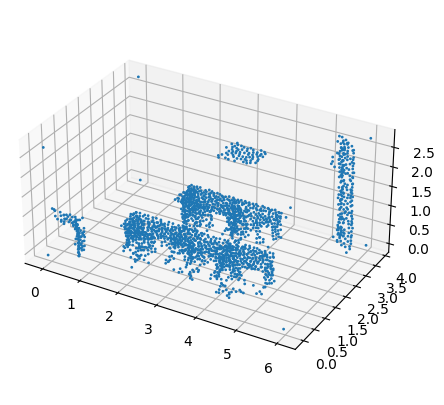

In [54]:
plot3d_points(scan_points[2])